In [1]:
# import libraries
import pandas as pd
import numpy as np

Perform lift and sentiment analysis on each candidate and issue:
![title](taskC.png)

To do the above analysis, you will have to write a script to parse each tweet and extract parts that pertain to a candidate and attribute. Provide details of how you accomplished this task in a script. 

In [2]:
# read the csv into a dataframe
tweets = pd.read_csv("tot_tweets.csv")
tweets = tweets.drop(columns=['id'])

In [3]:
tweets

,location,text
0,"Tennessee, USA","b""RT @AliAdair22: \xf0\x9f\x90\xa6Next, Beto O..."
1,NaN,"b""RT @AliAdair22: \xf0\x9f\x90\xa6Next, Beto O..."
2,NaN,"b""Ted Cruz, Beto O'Rourke try to rally Latino ..."
3,America,b'RT @RonNehring: Third poll now showing Cruz ...
4,West Texas,"b'Beto O\xe2\x80\x99Rourke, the Democratic con..."
5,"Dallas, TX",b'RT @wfaa: Does Texas\xe2\x80\x99 senate race...
6,NaN,"b""RT @lizlogan76: Beto could win this, because..."
7,"Atlanta, GA","b""RT @FoxNews: Ted Cruz, Beto O'Rourke try to ..."
8,Oregon,"b""RT @Patriot_Musket: Lots of really good news..."
9,Australia,"b""RT @AMHotFlash: BETO'S campaign has raised m..."


In [4]:
# Let's write a function to take care of the names
def replace_names(text):
    
    text = text.lower()
    
    beto_words = ['@betoorourke' , "beto o'rourke", "o'rourke", 'rourke']
    cruz_words = ['@tedcruz', 'ted cruz', 'ted']
    
    for w in beto_words:
        try:
            text = text.replace(w, 'beto')
        except:
            pass
    for w in cruz_words:
        try:
            text = text.replace(w, 'cruz')
        except:
            pass
    
    return text

In [5]:
# apply replace_names() on each tweet
text_column = []
for t in tweets.itertuples():
    text = t.text
    new_text = replace_names(text)
    text_column.append(new_text)

In [6]:
# replace old text with new text
tweets.text = text_column

In [7]:
for i in tweets.itertuples():
    text = i.text
    print(text)
    break

b"rt @aliadair22: \xf0\x9f\x90\xa6next, beto beto, running for u.s. senate in #texas. please follow, tweet, contribute, volunteer, anything\xe2\x80\xa6"


In [8]:
# word frequency
# grab word frequency using nltk library
import nltk
# stop words
from nltk.corpus import stopwords

In [9]:
# put all tweets together
text=tweets["text"].values.tolist()
text=" ".join(text)
text = text.lower()

In [10]:
# tokenize the text 
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)

In [11]:
# let's do a word count
from collections import Counter

# counter object
words = Counter()

# update counter with new words
words.update(tokens)

In [12]:
# first order check
words.most_common()[:10]

[('xe2', 6577),
 ('x80', 6452),
 ('b', 5743),
 ('rt', 4791),
 ('the', 4411),
 ('xa6', 3838),
 ('texas', 3134),
 ('in', 3112),
 ('beto', 3107),
 ('cruz', 3104)]

In [13]:
# store the stop words
stopwords = stopwords.words('english')[:]

In [14]:
# lets do this again: remove stop words, single letter variable names
filter_words = Counter(x for x in tokens if x not in stopwords and x.isdigit() == False and len(x) != 1 and x.isalpha() == True)

In [15]:
filter_words.most_common()[:1000]

[('rt', 4791),
 ('texas', 3134),
 ('beto', 3107),
 ('cruz', 3104),
 ('senate', 3003),
 ('https', 2088),
 ('co', 2007),
 ('race', 1956),
 ('vote', 877),
 ('single', 785),
 ('msnbc', 735),
 ('word', 722),
 ('win', 703),
 ('every', 662),
 ('care', 656),
 ('repeal', 652),
 ('act', 652),
 ('pre', 652),
 ('insiscruz', 651),
 ('affordable', 651),
 ('including', 651),
 ('protections', 651),
 ('existing', 650),
 ('condi', 650),
 ('debate', 502),
 ('nplease', 491),
 ('believe', 487),
 ('retweet', 483),
 ('sample', 483),
 ('bigger', 479),
 ('size', 478),
 ('guy', 401),
 ('leads', 352),
 ('show', 345),
 ('skateboard', 343),
 ('still', 337),
 ('side', 336),
 ('election', 334),
 ('polling', 331),
 ('skates', 327),
 ('across', 327),
 ('stage', 327),
 ('hoping', 327),
 ('dont', 327),
 ('history', 319),
 ('texassenate', 301),
 ('million', 289),
 ('want', 256),
 ('looking', 241),
 ('cbsnews', 238),
 ('ahead', 237),
 ('problem', 237),
 ('integrity', 235),
 ('serious', 232),
 ('becaus', 232),
 ('campaign'

In [16]:
pd.set_option('display.max_colwidth', -1)

In [17]:
# lets search for issues

tweets[tweets['text'].str.contains("immigrate")]

,location,text
3224,"Myrtle Beach, SC",b'@iowahawkblog it is my intention to immigrate to and seek political asylum in texas. i will be coming from sc. i h\xe2\x80\xa6 https://t.co/m17kfnyel8'


In [18]:
# Let's write a function to take care of the ISSUES
def replace_issues(text):
    
    text = text.lower()
    
    healthcare = ['affordable care act' , "healthcare", "aca"]
    taxes = ['tax', 'taxes']
    climatechange = ['climate', 'climatechange']
    bordercontrol = ['border', 'immigration', 'bordersecurity', 'borders']
    character = ['lyin', 'leader']
    
    for w in healthcare:
        try:
            text = text.replace(w, ' healthcare ')
        except:
            pass
    for w in taxes:
        try:
            text = text.replace(w, ' taxes ')
        except:
            pass
    for w in climatechange:
        try:
            text = text.replace(w, ' climatechange ')
        except:
            pass
    for w in bordercontrol:
        try:
            text = text.replace(w, ' bordercontrol ')
        except:
            pass

    for w in character:
        try:
            text = text.replace(w, ' character ')
        except:
            pass
    
    return text

In [19]:
# apply replace_issues() on each tweet
text_column = []
for t in tweets.itertuples():
    text = t.text
    new_text = replace_issues(text)
    text_column.append(new_text)

In [20]:
# replace old text with new text
tweets.text = text_column

In [21]:
# do another word count
# put all tweets together
text=tweets["text"].values.tolist()
text=" ".join(text)
text = text.lower()

# tokenize the text 
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)

# counter object
words = Counter()

# update counter with new words
words.update(tokens)

In [22]:
# issues
issues = ['healthcare', 'taxes', 'climatechange', 'bordercontrol', 'character']

In [23]:
# lets do this again: remove stop words, single letter variable names
filter_words = Counter(x for x in tokens if x not in stopwords and x.isdigit() == False and len(x) != 1 and x.isalpha() == True and x in issues)

In [24]:
filter_words.most_common()[:]

[('healthcare', 730),
 ('character', 289),
 ('taxes', 196),
 ('bordercontrol', 64),
 ('climatechange', 36)]

Issues:
* healthcare
* character
* taxes
* bordercontrol

#### Calculate Lift for Candidate / Issue

Get count of tweets mentioning Beto / Cruz, and count of all tweets with Beto and/or Cruz in it

In [25]:
beto_count = 0
cruz_count = 0
n_tweets = 0
for t in tweets.itertuples():
    if 'beto' in t.text and 'cruz' in t.text:
        beto_count += 1
        cruz_count += 1
        n_tweets += 1
    elif 'beto' in t.text:
        beto_count += 1
        n_tweets += 1
    elif 'cruz' in t.text:
        cruz_count += 1        
        n_tweets += 1

In [50]:
n_tweets

4677

Get count of tweets for each issue!

In [26]:
healthcare_count = 0
character_count = 0
taxes_count = 0
bordercontrol_count = 0
for t in tweets.itertuples():
    if 'healthcare' in t.text:
        healthcare_count += 1
    elif 'character' in t.text:
        character_count += 1
    elif 'taxes' in t.text:
        taxes_count += 1
    elif 'bordercontrol' in t.text:
        bordercontrol_count += 1

Get count of tweets with 

Beto/healthcare, Beto/character, Beto/taxes, Beto/bordercontrol


Cruz/healthcare, Cruz/character, Cruz/taxes, Cruz/bordercontrol

In [27]:
# beto and issues
bh_count = 0
bc_count = 0
bt_count = 0
bb_count = 0

# cruz and issues
ch_count = 0
cc_count = 0
ct_count = 0
cb_count = 0

for t in tweets.itertuples():
    # beto
    if 'beto' in t.text and 'healthcare' in t.text:
        bh_count += 1
    if 'beto' in t.text and 'character' in t.text:
        bc_count += 1
    if 'beto' in t.text and 'taxes' in t.text:
        bt_count += 1
    if 'beto' in t.text and 'bordercontrol' in t.text:
        bb_count += 1
    
    # cruz
    if 'cruz' in t.text and 'healthcare' in t.text:
        ch_count += 1
    if 'cruz' in t.text and 'character' in t.text:
        cc_count += 1
    if 'cruz' in t.text and 'taxes' in t.text:
        ct_count += 1
    if 'cruz' in t.text and 'bordercontrol' in t.text:
        cb_count += 1

In [28]:
candidate_counts = [beto_count, cruz_count]
issue_counts = [healthcare_count, character_count, taxes_count, bordercontrol_count]
combo_counts = [bh_count, bc_count, bt_count, bb_count, ch_count, cc_count, ct_count, cb_count]
lifts = [] # order: [0] beto vs healthcare, [1] beto vs character, [2] beto vs taxes, [3] beto vs bordercontrol
           #        [4] cruz vs healthcare, [5] cruz vs character, [6] cruz vs taxes, [7] cruz vs bordercontrol
index = 0
for cand_count in candidate_counts:
    for issue_count in issue_counts:
        lifts.append( (len(tweets) * combo_counts[index]) / (cand_count * issue_count) )
    index +=1 

In [29]:
lifts = np.reshape(lifts, (2, 4)).T # reshape for similarities matrix

In [30]:
similarities = pd.DataFrame(lifts, columns=['beto', 'cruz'], index=['healthcare', 'character', 'taxes', 'bordercontrol'])

In [31]:
similarities

,beto,cruz
healthcare,0.171859,0.635553
character,0.440201,1.627908
taxes,1.090934,4.034382
bordercontrol,2.090956,7.732565


# Task D

### Get dissimilarity matrix

In [71]:
attri_list=["beto","cruz","healthcare","character","taxes","bordercontrol"]

In [72]:
attri_combos = []
for i in range (len(attri_list)):
    for j in range (len(attri_list)):
        combo = (attri_list[i], attri_list[j])
        attri_combos.append(combo)

In [73]:
attri_combos 

[('beto', 'beto'),
 ('beto', 'cruz'),
 ('beto', 'healthcare'),
 ('beto', 'character'),
 ('beto', 'taxes'),
 ('beto', 'bordercontrol'),
 ('cruz', 'beto'),
 ('cruz', 'cruz'),
 ('cruz', 'healthcare'),
 ('cruz', 'character'),
 ('cruz', 'taxes'),
 ('cruz', 'bordercontrol'),
 ('healthcare', 'beto'),
 ('healthcare', 'cruz'),
 ('healthcare', 'healthcare'),
 ('healthcare', 'character'),
 ('healthcare', 'taxes'),
 ('healthcare', 'bordercontrol'),
 ('character', 'beto'),
 ('character', 'cruz'),
 ('character', 'healthcare'),
 ('character', 'character'),
 ('character', 'taxes'),
 ('character', 'bordercontrol'),
 ('taxes', 'beto'),
 ('taxes', 'cruz'),
 ('taxes', 'healthcare'),
 ('taxes', 'character'),
 ('taxes', 'taxes'),
 ('taxes', 'bordercontrol'),
 ('bordercontrol', 'beto'),
 ('bordercontrol', 'cruz'),
 ('bordercontrol', 'healthcare'),
 ('bordercontrol', 'character'),
 ('bordercontrol', 'taxes'),
 ('bordercontrol', 'bordercontrol')]

In [74]:
attri_combo_dict = {}
for a in attri_combos:
    attri_combo_dict[a] = 0

In [75]:
for a in attri_combos:
    for c in tweets["text"]:
        attri1 = a[0]
        attri2 = a[1]
        if attri1 in c and attri2 in c:
            attri_combo_dict[a] += 1

In [76]:
attri_combo_dict

{('beto', 'beto'): 3249,
 ('beto', 'cruz'): 1913,
 ('beto', 'healthcare'): 71,
 ('beto', 'character'): 270,
 ('beto', 'taxes'): 83,
 ('beto', 'bordercontrol'): 14,
 ('cruz', 'beto'): 1913,
 ('cruz', 'cruz'): 3341,
 ('cruz', 'healthcare'): 657,
 ('cruz', 'character'): 87,
 ('cruz', 'taxes'): 82,
 ('cruz', 'bordercontrol'): 38,
 ('healthcare', 'beto'): 71,
 ('healthcare', 'cruz'): 657,
 ('healthcare', 'healthcare'): 730,
 ('healthcare', 'character'): 4,
 ('healthcare', 'taxes'): 0,
 ('healthcare', 'bordercontrol'): 0,
 ('character', 'beto'): 270,
 ('character', 'cruz'): 87,
 ('character', 'healthcare'): 4,
 ('character', 'character'): 289,
 ('character', 'taxes'): 0,
 ('character', 'bordercontrol'): 0,
 ('taxes', 'beto'): 83,
 ('taxes', 'cruz'): 82,
 ('taxes', 'healthcare'): 0,
 ('taxes', 'character'): 0,
 ('taxes', 'taxes'): 115,
 ('taxes', 'bordercontrol'): 1,
 ('bordercontrol', 'beto'): 14,
 ('bordercontrol', 'cruz'): 38,
 ('bordercontrol', 'healthcare'): 0,
 ('bordercontrol', 'charac

In [77]:
attri_dict = {}
for b in attri_list:
    for c in tweets["text"]:
        if b in c:
            if b in attri_dict:
                attri_dict[b] += 1
            else:
                attri_dict[b] = 1

In [78]:
attri_dict

{'beto': 3249,
 'cruz': 3341,
 'healthcare': 730,
 'character': 289,
 'taxes': 115,
 'bordercontrol': 61}

In [60]:
tot_number_of_tweets=n_tweets

In [79]:
tot_number_of_tweets=len(tweets)

In [80]:
tot_number_of_tweets

5741

In [81]:
lifts_dict = {}
for a in attri_combo_dict:
    if a[0] == a[1]:
        lift = 0
    else:
        combo_count = attri_combo_dict[a]
        attri1_count = attri_dict[a[0]]
        attri2_count = attri_dict[a[1]]
        lift = (tot_number_of_tweets * combo_count) / (attri1_count * attri2_count)
    lifts_dict[a] = lift

In [82]:
matrix = []
row = -1
current_attri = ''
for combo in lifts_dict:
    attri = combo[0]
    lift = lifts_dict[combo]
    if attri == current_attri:
        matrix[row].append(lift)
    else:
        row += 1
        current_attri = attri
        matrix.append([])
        matrix[row].append(lift)

In [83]:
simi = pd.DataFrame(matrix, columns=attri_list, index=attri_list)

In [84]:
simi

,beto,cruz,healthcare,character,taxes,bordercontrol
beto,0.000000,1.011757,0.171859,1.650835,1.275317,0.405542
cruz,1.011757,0.000000,1.546513,0.517288,1.225257,1.070446
healthcare,0.171859,1.546513,0.000000,0.108850,0.000000,0.000000
character,1.650835,0.517288,0.108850,0.000000,0.000000,0.000000
taxes,1.275317,1.225257,0.000000,0.000000,0.000000,0.818389
bordercontrol,0.405542,1.070446,0.000000,0.000000,0.818389,0.000000


In [66]:
#dissimilarity
dis=matrix
for i in range (len(matrix)):
    for j in range (len(matrix[i])):
        if matrix[i][j] != 0:
            dis[i][j] = 1/matrix[i][j]

In [67]:
dissimilarity = pd.DataFrame(dis, columns=attri_list, index=attri_list)

In [68]:
dissimilarity

,beto,cruz,healthcare,character,taxes,bordercontrol
beto,0.000000,1.213232,7.142444,0.743561,0.962503,3.026803
cruz,1.213232,0.000000,0.793719,2.372945,1.001828,1.146715
healthcare,7.142444,0.793719,0.000000,11.276994,0.000000,0.000000
character,0.743561,2.372945,11.276994,0.000000,0.000000,0.000000
taxes,0.962503,1.001828,0.000000,0.000000,0.000000,1.499893
bordercontrol,3.026803,1.146715,0.000000,0.000000,1.499893,0.000000


### Plot MDS Map

In [75]:
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

In [240]:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(dis).embedding_

In [242]:
dissimilarity = dissimilarity.max() / similarities * 100
dissimilarity[np.isinf(dissimilarity)] = 0

# Plot the edges
start_idx, end_idx = np.where(pos)

values = np.abs(dissimilarity)

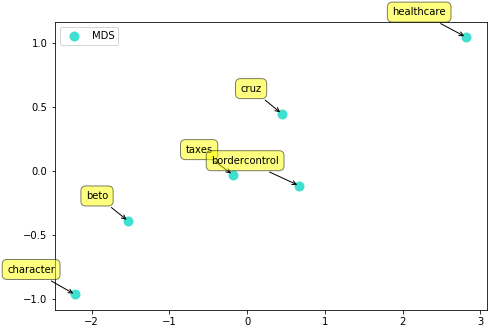

In [243]:
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 100

plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

for label, x, y in zip(attri_list, pos[:, 0], pos[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

Healthcare is very far away from both Cruz and Beto. This could be because healthcare is a topic that could be talked about by itself a lot without mention of cruz and beto. Both Cruz and Beto, seeing that healthcare is a very talked about topic, could jump on this and do a better job associating their positions on healthcare with the public.